# Script per i troncamenti

## Import delle librerie

In [2]:
import pandas as pd

## Lettura delle tuple

In [3]:
istanzeMerc=pd.DataFrame()
perc = 'D:/Documenti/universita/Magistrale/Secondo_anno/Impianti di Elaborazione/Benchmark/FFDA/ffdatoolset_21'

for i in range(1,509):
    doc=pd.read_csv(perc+'/tupling_MercuryErrorLog_200/tuple_'+str(i), names = ['Timestamp', 'Node', 'Subsystem', 'Message'])
    doc.loc[:,'Node'] = doc.loc[:,'Timestamp'].str.split(' ', n=3).str[1]
    doc.loc[:,'Subsystem'] = doc.loc[:,'Timestamp'].str.split(' ', n=3).str[2]
    doc.loc[:,'Message'] = doc.loc[:,'Timestamp'].str.split(' ', n=3).str[3]
    doc.loc[:,'Timestamp'] = doc.loc[:,'Timestamp'].str.split(' ', n=3).str[0]
    doc.insert(4, 'Tupla', str(i), True)
    istanzeMerc = istanzeMerc.append(doc)
    
istanzeMerc['Tupla']=pd.to_numeric(istanzeMerc['Tupla'])
istanzeMerc

,Timestamp,Node,Subsystem,Message,Tupla
0,1167637660,tg-c645,PRO,+BEGIN HARDWARE ERROR STATE AT CMC,1
1,1167637660,tg-c645,PRO,Device Error Info Section,1
2,1167637660,tg-c645,PRO,Error Map: x,1
3,1167637720,tg-c645,PRO,+BEGIN HARDWARE ERROR STATE AT CMC,1
4,1167637720,tg-c645,PRO,Device Error Info Section,1
...,...,...,...,...,...
559,1174943008,tg-c196,I-O,hda: packet command error: error=x,507
560,1174943068,tg-c128,I-O,hda: packet command error: error=x,507
561,1174943068,tg-c128,I-O,hda: packet command error: error=x,507
0,1174943925,tg-c196,NET,connection down,508


## Algoritmo di conteggio dei troncamenti Mercury

In [22]:
trunc_countMerc = 0
nodiMerc = pd.DataFrame()

for t in istanzeMerc['Tupla'].unique():
    if t != 508:
        mask = (istanzeMerc['Tupla']==t)
        mask_next = (istanzeMerc['Tupla']==t+1)
        istanze_filtrate = istanzeMerc.loc[mask]
        istanze_filtrate_next = istanzeMerc.loc[mask_next]
        if (istanze_filtrate.loc[istanze_filtrate.shape[0]-1, :].Node== istanze_filtrate_next.loc[0, :].Node):
            trunc_countMerc = trunc_countMerc + 1
            print('Troncamento : tupla '+str(t)+' - tupla '+str(t+1) +
                  '--- Nodo: '+ str(istanze_filtrate.loc[istanze_filtrate.shape[0]-1, :].Node))
            nodiMerc = nodiMerc.append(istanze_filtrate.loc[istanze_filtrate.shape[0]-1, :])
    else:
        print("il file è finito")
print('Troncamenti : ' + str(trunc_countMerc))
print('Percentuale di troncamenti: '+str(trunc_countMerc/508*100)+' %')

Troncamento : tupla 2 - tupla 3--- Nodo: tg-c238
Troncamento : tupla 3 - tupla 4--- Nodo: tg-c238
Troncamento : tupla 4 - tupla 5--- Nodo: tg-c238
Troncamento : tupla 5 - tupla 6--- Nodo: tg-c238
Troncamento : tupla 6 - tupla 7--- Nodo: tg-c238
Troncamento : tupla 7 - tupla 8--- Nodo: tg-c238
Troncamento : tupla 8 - tupla 9--- Nodo: tg-c238
Troncamento : tupla 9 - tupla 10--- Nodo: tg-c238
Troncamento : tupla 10 - tupla 11--- Nodo: tg-c238
Troncamento : tupla 11 - tupla 12--- Nodo: tg-c238
Troncamento : tupla 12 - tupla 13--- Nodo: tg-c238
Troncamento : tupla 13 - tupla 14--- Nodo: tg-c238
Troncamento : tupla 14 - tupla 15--- Nodo: tg-c238
Troncamento : tupla 16 - tupla 17--- Nodo: tg-c846
Troncamento : tupla 21 - tupla 22--- Nodo: tg-c781
Troncamento : tupla 22 - tupla 23--- Nodo: tg-c781
Troncamento : tupla 23 - tupla 24--- Nodo: tg-c781
Troncamento : tupla 24 - tupla 25--- Nodo: tg-c781
Troncamento : tupla 25 - tupla 26--- Nodo: tg-c781
Troncamento : tupla 26 - tupla 27--- Nodo: tg-

Troncamento : tupla 332 - tupla 333--- Nodo: tg-c401
Troncamento : tupla 333 - tupla 334--- Nodo: tg-c401
Troncamento : tupla 336 - tupla 337--- Nodo: tg-s044
Troncamento : tupla 338 - tupla 339--- Nodo: tg-c401
Troncamento : tupla 341 - tupla 342--- Nodo: tg-c324
Troncamento : tupla 344 - tupla 345--- Nodo: tg-c669
Troncamento : tupla 350 - tupla 351--- Nodo: tg-master
Troncamento : tupla 352 - tupla 353--- Nodo: tg-c242
Troncamento : tupla 353 - tupla 354--- Nodo: tg-c242
Troncamento : tupla 354 - tupla 355--- Nodo: tg-c242
Troncamento : tupla 355 - tupla 356--- Nodo: tg-c242
Troncamento : tupla 356 - tupla 357--- Nodo: tg-c242
Troncamento : tupla 357 - tupla 358--- Nodo: tg-c242
Troncamento : tupla 358 - tupla 359--- Nodo: tg-c242
Troncamento : tupla 359 - tupla 360--- Nodo: tg-c242
Troncamento : tupla 360 - tupla 361--- Nodo: tg-c242
Troncamento : tupla 361 - tupla 362--- Nodo: tg-c242
Troncamento : tupla 362 - tupla 363--- Nodo: tg-c242
Troncamento : tupla 363 - tupla 364--- Nodo:

<AxesSubplot:xlabel='Node', ylabel='Num Troncamenti'>

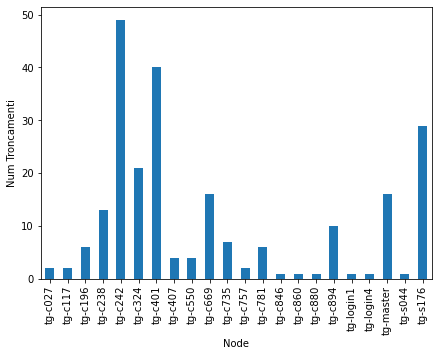

In [34]:
nodiMerc.groupby(by='Node').count().Timestamp.plot.bar(figsize=(7,5), ylabel='Num Troncamenti')

## Lettura Tuple BGL

In [9]:
istanzeBGL=pd.DataFrame()
perc = 'D:/Documenti/universita/Magistrale/Secondo_anno/Impianti di Elaborazione/Benchmark/FFDA/ffdatoolset_21'

for i in range(1,404):
    doc=pd.read_csv(perc+'/tupling_BGLErrorLog_200/tuple_'+str(i), names = ['Timestamp', 'Node', 'Card', 'Message'])
    doc.loc[:,'Node'] = doc.loc[:,'Timestamp'].str.split(' ', n=3).str[1]
    doc.loc[:,'Card'] = doc.loc[:,'Timestamp'].str.split(' ', n=3).str[2]
    doc.loc[:,'Message'] = doc.loc[:,'Timestamp'].str.split(' ', n=3).str[3]
    doc.loc[:,'Timestamp'] = doc.loc[:,'Timestamp'].str.split(' ', n=3).str[0]
    doc.loc[doc['Card'].str.contains('J18'),'Card type'] = 'I-O'
    doc.loc[~doc['Card'].str.contains('J18'),'Card type'] = 'computation'
    doc.insert(4, 'Tupla', str(i), True)
    istanzeBGL = istanzeBGL.append(doc)
    
istanzeBGL['Tupla']=pd.to_numeric(istanzeBGL['Tupla'])
istanzeBGL

,Timestamp,Node,Card,Message,Tupla,Card type
0,1128621350,R00-M0-N0,J18-U01,Lustre mount FAILED : bglio2 : block_id : loca...,1,I-O
1,1128621350,R01-M1-N0,J18-U11,Lustre mount FAILED : bglio21 : block_id : loc...,1,I-O
2,1128621351,R07-M0-NC,J18-U01,Lustre mount FAILED : bglio124 : block_id : lo...,1,I-O
3,1128621351,R00-M0-N4,J18-U01,Lustre mount FAILED : bglio4 : block_id : loca...,1,I-O
4,1128621351,R02-M0-N4,J18-U01,Lustre mount FAILED : bglio36 : block_id : loc...,1,I-O
...,...,...,...,...,...,...
3,1136390405,R00-M0-NC,J18-U11,idoproxy communication failure: socket closed,403,I-O
4,1136390405,R36-M0-NC,J18-U11,idoproxy communication failure: socket closed,403,I-O
5,1136390405,R30-M0-NC,J18-U11,idoproxy communication failure: socket closed,403,I-O
6,1136390405,R31-M0-NC,J18-U11,idoproxy communication failure: socket closed,403,I-O


## Algoritmo di conteggio dei troncamenti BGL

In [7]:
trunc_countBGL = 0
nodiBGL = pd.DataFrame()

for t in istanzeBGL['Tupla'].unique():
    if t != 403:
        mask = (istanzeBGL['Tupla']==t)
        mask_next = (istanzeBGL['Tupla']==t+1)
        istanze_filtrate_bgl = istanzeBGL.loc[mask]
        istanze_filtrate_next_bgl = istanzeBGL.loc[mask_next]
        if (istanze_filtrate_bgl.loc[istanze_filtrate_bgl.shape[0]-1, :].Node== istanze_filtrate_next_bgl.loc[0, :].Node):
            trunc_countBGL = trunc_countBGL + 1
            print('Troncamento '+ str(trunc_countBGL)+ ': tupla '+str(t)+' - tupla '+str(t+1) + '--- Nodo: '+ str(istanze_filtrate_bgl.loc[istanze_filtrate_bgl.shape[0]-1, :].Node))
            nodiBGL = nodiBGL.append(istanze_filtrate_bgl.loc[istanze_filtrate_bgl.shape[0]-1, :])
    else:
        print("il file è finito")
print('Troncamenti : ' + str(trunc_countBGL))
print('Percentuale di troncamenti: '+str(trunc_countBGL/403*100)+' %')

Troncamento 1: tupla 17 - tupla 18--- Nodo: R44-M1-N1
Troncamento 2: tupla 28 - tupla 29--- Nodo: R00-M0-NC
Troncamento 3: tupla 31 - tupla 32--- Nodo: R51-M0-N8
Troncamento 4: tupla 36 - tupla 37--- Nodo: R36-M1-N5
Troncamento 5: tupla 37 - tupla 38--- Nodo: R36-M1-N5
Troncamento 6: tupla 38 - tupla 39--- Nodo: R36-M1-N5
Troncamento 7: tupla 39 - tupla 40--- Nodo: R36-M1-N5
Troncamento 8: tupla 40 - tupla 41--- Nodo: R36-M1-N5
Troncamento 9: tupla 41 - tupla 42--- Nodo: R36-M1-N5
Troncamento 10: tupla 46 - tupla 47--- Nodo: R02-M0-N4
Troncamento 11: tupla 47 - tupla 48--- Nodo: R02-M0-N4
Troncamento 12: tupla 48 - tupla 49--- Nodo: R02-M0-N4
Troncamento 13: tupla 54 - tupla 55--- Nodo: R53-M1-NC
Troncamento 14: tupla 92 - tupla 93--- Nodo: R42-M1-N3
Troncamento 15: tupla 170 - tupla 171--- Nodo: R57-M1-N0
Troncamento 16: tupla 194 - tupla 195--- Nodo: R36-M1-N0
Troncamento 17: tupla 302 - tupla 303--- Nodo: R21-M1-N7
Troncamento 18: tupla 318 - tupla 319--- Nodo: R12-M0-N0
Troncamento

In [8]:
nodiBGL.groupby(by='Node').count()

,Card,Message,Timestamp,Tupla
Node,,,,
R00-M0-NC,1,1,1,1
R02-M0-N4,3,3,3,3
R03-M0-N7,1,1,1,1
R12-M0-N0,3,3,3,3
R21-M1-N7,1,1,1,1
R36-M1-N0,1,1,1,1
R36-M1-N5,6,6,6,6
R42-M1-N3,1,1,1,1
R44-M1-N1,1,1,1,1


# Script per le collisioni

## Algoritmo di conteggio delle collisioni Mercury

In [26]:
coll_countMerc = 0
collMerc = {}

for t in istanzeMerc['Tupla'].unique():
    if t != 508:
        mask = (istanzeMerc['Tupla']==t)
        istanze_filtrate = istanzeMerc.loc[mask]
        if (len(istanze_filtrate.Node.unique())>1):
            coll_countMerc = coll_countMerc+1
            print('Collisione -- tupla: '+ str(t))
            collMerc[t]=istanze_filtrate.Node.unique()
    else:
        print('File finito')
print('Collisioni : ' + str(coll_countMerc))
print('Percentuale di collisioni: '+str(coll_countMerc/508*100)+' %')

Collisione -- tupla: 8
Collisione -- tupla: 15
Collisione -- tupla: 26
Collisione -- tupla: 29
Collisione -- tupla: 37
Collisione -- tupla: 50
Collisione -- tupla: 69
Collisione -- tupla: 74
Collisione -- tupla: 77
Collisione -- tupla: 114
Collisione -- tupla: 116
Collisione -- tupla: 117
Collisione -- tupla: 123
Collisione -- tupla: 127
Collisione -- tupla: 135
Collisione -- tupla: 144
Collisione -- tupla: 166
Collisione -- tupla: 167
Collisione -- tupla: 171
Collisione -- tupla: 186
Collisione -- tupla: 196
Collisione -- tupla: 298
Collisione -- tupla: 299
Collisione -- tupla: 302
Collisione -- tupla: 305
Collisione -- tupla: 315
Collisione -- tupla: 317
Collisione -- tupla: 318
Collisione -- tupla: 325
Collisione -- tupla: 326
Collisione -- tupla: 331
Collisione -- tupla: 332
Collisione -- tupla: 334
Collisione -- tupla: 335
Collisione -- tupla: 339
Collisione -- tupla: 370
Collisione -- tupla: 377
Collisione -- tupla: 397
Collisione -- tupla: 402
Collisione -- tupla: 412
Collisione

In [25]:
collMerc

{8: array(['tg-c238', 'tg-master'], dtype=object),
 15: array(['tg-c238', 'tg-master', 'tg-c648'], dtype=object),
 26: array(['tg-c781', 'tg-s176'], dtype=object),
 29: array(['tg-c238', 'tg-c383'], dtype=object),
 37: array(['tg-c415', 'tg-c781'], dtype=object),
 50: array(['tg-c733', 'tg-c735'], dtype=object),
 69: array(['tg-login1', 'tg-login3', 'tg-c669', 'tg-login2', 'tg-login4',
        'tg-s131', 'tg-s159'], dtype=object),
 74: array(['tg-master', 'tg-c450'], dtype=object),
 77: array(['tg-master', 'tg-c735', 'tg-c696'], dtype=object),
 114: array(['tg-c572', 'tg-c669', 'tg-c401', 'tg-c850'], dtype=object),
 116: array(['tg-c669', 'tg-c401'], dtype=object),
 117: array(['tg-c669', 'tg-c401'], dtype=object),
 123: array(['tg-c669', 'tg-c401'], dtype=object),
 127: array(['tg-c669', 'tg-c401'], dtype=object),
 135: array(['tg-c407', 'tg-c401'], dtype=object),
 144: array(['tg-c407', 'tg-c401'], dtype=object),
 166: array(['tg-c572', 'tg-c106'], dtype=object),
 167: array(['tg-c88

## Algoritmo di conteggio delle collisioni BGL

In [29]:
coll_countBGL = 0
collBGL = {}

for t in istanzeBGL['Tupla'].unique():
    if t != 403:
        mask = (istanzeBGL['Tupla']==t)
        istanze_filtrate = istanzeBGL.loc[mask]
        if (len(istanze_filtrate.Node.unique())>1):
            coll_countBGL = coll_countBGL+1
            print('Collisione -- tupla: '+ str(t))
            collBGL[t]=istanze_filtrate.Node.unique()
    else:
        print('File finito')
print('Collisioni : ' + str(coll_countBGL))
print('Percentuale di collisioni: '+str(coll_countBGL/403*100)+' %')

Collisione -- tupla: 1
Collisione -- tupla: 2
Collisione -- tupla: 15
Collisione -- tupla: 19
Collisione -- tupla: 23
Collisione -- tupla: 24
Collisione -- tupla: 26
Collisione -- tupla: 27
Collisione -- tupla: 33
Collisione -- tupla: 34
Collisione -- tupla: 35
Collisione -- tupla: 43
Collisione -- tupla: 44
Collisione -- tupla: 45
Collisione -- tupla: 47
Collisione -- tupla: 50
Collisione -- tupla: 51
Collisione -- tupla: 55
Collisione -- tupla: 61
Collisione -- tupla: 63
Collisione -- tupla: 64
Collisione -- tupla: 65
Collisione -- tupla: 66
Collisione -- tupla: 67
Collisione -- tupla: 68
Collisione -- tupla: 69
Collisione -- tupla: 70
Collisione -- tupla: 71
Collisione -- tupla: 72
Collisione -- tupla: 77
Collisione -- tupla: 79
Collisione -- tupla: 80
Collisione -- tupla: 83
Collisione -- tupla: 84
Collisione -- tupla: 85
Collisione -- tupla: 89
Collisione -- tupla: 95
Collisione -- tupla: 97
Collisione -- tupla: 98
Collisione -- tupla: 102
Collisione -- tupla: 104
Collisione -- tu

In [30]:
collBGL

{1: array(['R00-M0-N0', 'R01-M1-N0', 'R07-M0-NC', 'R00-M0-N4', 'R02-M0-N4',
        'R01-M0-N8', 'R06-M0-N0', 'R04-M0-N0', 'R05-M0-NC', 'R03-M0-NC',
        'R03-M0-N8', 'R05-M0-N8', 'R05-M1-N4', 'R06-M0-NC', 'R00-M0-NC',
        'R00-M1-N0', 'R00-M1-N4', 'R03-M1-NC', 'R02-M1-NC', 'R04-M1-N8',
        'R04-M0-N8', 'R05-M1-NC', 'R02-M1-N0', 'R06-M0-N4', 'R04-M0-N4',
        'R00-M0-N8', 'R01-M1-N4', 'R07-M1-N8', 'R06-M1-NC', 'R07-M0-N4',
        'R06-M1-N8', 'R07-M1-N4', 'R02-M0-N8', 'R04-M0-NC', 'R01-M0-N4',
        'R06-M1-N0', 'R06-M0-N8', 'R05-M0-N4', 'R03-M1-N0', 'R02-M1-N8',
        'R02-M0-N0', 'R07-M1-N0', 'R02-M1-N4', 'R01-M1-N8', 'R05-M1-N0',
        'R00-M1-N8', 'R03-M0-N4', 'R03-M1-N4', 'R02-M0-NC', 'R01-M0-N0',
        'R04-M1-N0', 'R01-M0-NC', 'R05-M0-N0', 'R06-M1-N4', 'R04-M1-NC',
        'R04-M1-N4', 'R03-M1-N8', 'R03-M0-N0', 'R00-M1-NC', 'R07-M0-N8',
        'R01-M1-NC', 'R07-M0-N0', 'R07-M1-NC', 'R05-M1-N8'], dtype=object),
 2: array(['R77-M0-N0', 'R77-M0-NC', 'R77-M1-

## Algoritmo per le collisioni di BGL (considero le card)

In [16]:
coll_countBGL_card = 0
collBGL_card = {}

for t in istanzeBGL['Tupla'].unique():
    if t != 403:
        mask = (istanzeBGL['Tupla']==t)
        istanze_filtrate = istanzeBGL.loc[mask]
        if (len(istanze_filtrate.Card.unique())>1):
            coll_countBGL_card = coll_countBGL_card+1
            print('Collisione -- tupla: '+ str(t))
            collBGL_card[t]=istanze_filtrate.Card.unique()
    else:
        print('File finito')
print('Collisioni : ' + str(coll_countBGL_card))
print('Percentuale di collisioni: '+str(coll_countBGL_card/403*100)+' %')

Collisione -- tupla: 1
Collisione -- tupla: 2
Collisione -- tupla: 15
Collisione -- tupla: 19
Collisione -- tupla: 23
Collisione -- tupla: 24
Collisione -- tupla: 26
Collisione -- tupla: 27
Collisione -- tupla: 33
Collisione -- tupla: 34
Collisione -- tupla: 35
Collisione -- tupla: 43
Collisione -- tupla: 44
Collisione -- tupla: 45
Collisione -- tupla: 47
Collisione -- tupla: 50
Collisione -- tupla: 51
Collisione -- tupla: 55
Collisione -- tupla: 61
Collisione -- tupla: 63
Collisione -- tupla: 64
Collisione -- tupla: 65
Collisione -- tupla: 66
Collisione -- tupla: 67
Collisione -- tupla: 68
Collisione -- tupla: 69
Collisione -- tupla: 70
Collisione -- tupla: 71
Collisione -- tupla: 72
Collisione -- tupla: 77
Collisione -- tupla: 79
Collisione -- tupla: 80
Collisione -- tupla: 83
Collisione -- tupla: 84
Collisione -- tupla: 85
Collisione -- tupla: 89
Collisione -- tupla: 95
Collisione -- tupla: 98
Collisione -- tupla: 102
Collisione -- tupla: 104
Collisione -- tupla: 106
Collisione -- t

In [8]:
collBGL_card

{1: array(['J18-U01', 'J18-U11'], dtype=object),
 2: array(['J18-U11', 'J18-U01'], dtype=object),
 15: array(['J18-U11', 'J18-U01'], dtype=object),
 19: array(['J14-U01', 'J18-U11', 'J18-U01'], dtype=object),
 23: array(['J18-U11', 'J18-U01'], dtype=object),
 24: array(['J18-U11', 'J18-U01'], dtype=object),
 26: array(['J18-U11', 'J18-U01'], dtype=object),
 27: array(['J18-U01', 'J18-U11'], dtype=object),
 33: array(['J18-U01', 'J18-U11'], dtype=object),
 34: array(['J18-U11', 'J18-U01'], dtype=object),
 35: array(['J18-U11', 'J18-U01'], dtype=object),
 43: array(['J18-U11', 'J18-U01'], dtype=object),
 44: array(['J18-U11', 'J18-U01'], dtype=object),
 45: array(['J18-U11', 'J18-U01'], dtype=object),
 47: array(['J04-U11', 'J18-U11', 'J18-U01'], dtype=object),
 50: array(['J18-U11', 'J18-U01'], dtype=object),
 51: array(['J18-U11', 'J18-U01'], dtype=object),
 55: array(['J18-U01', 'J15-U01'], dtype=object),
 61: array(['J18-U11', 'J18-U01'], dtype=object),
 63: array(['J18-U11', 'J18-U0

## Algoritmo per le collisioni BGL (considero il tipo di card)

In [17]:
coll_countBGL_cardtype = 0
collBGL_cardtype = {}

for t in istanzeBGL['Tupla'].unique():
    if t != 403:
        mask = (istanzeBGL['Tupla']==t)
        istanze_filtrate = istanzeBGL.loc[mask]
        if (len(istanze_filtrate['Card type'].unique())>1):
            coll_countBGL_cardtype = coll_countBGL_cardtype+1
            print('Collisione -- tupla: '+ str(t))
            collBGL_cardtype[t]=istanze_filtrate['Card type'].unique()
    else:
        print('File finito')
print('Collisioni : ' + str(coll_countBGL_cardtype))
print('Percentuale di collisioni: '+str(coll_countBGL_cardtype/403*100)+' %')

Collisione -- tupla: 19
Collisione -- tupla: 47
Collisione -- tupla: 55
Collisione -- tupla: 200
Collisione -- tupla: 250
Collisione -- tupla: 251
Collisione -- tupla: 257
Collisione -- tupla: 258
Collisione -- tupla: 259
Collisione -- tupla: 260
Collisione -- tupla: 261
Collisione -- tupla: 262
Collisione -- tupla: 263
Collisione -- tupla: 265
Collisione -- tupla: 275
Collisione -- tupla: 289
Collisione -- tupla: 298
Collisione -- tupla: 307
Collisione -- tupla: 315
Collisione -- tupla: 316
Collisione -- tupla: 337
Collisione -- tupla: 340
Collisione -- tupla: 351
Collisione -- tupla: 359
Collisione -- tupla: 376
Collisione -- tupla: 381
Collisione -- tupla: 382
Collisione -- tupla: 383
Collisione -- tupla: 384
Collisione -- tupla: 386
Collisione -- tupla: 387
Collisione -- tupla: 388
Collisione -- tupla: 389
Collisione -- tupla: 390
Collisione -- tupla: 391
Collisione -- tupla: 393
Collisione -- tupla: 394
Collisione -- tupla: 395
Collisione -- tupla: 400
File finito
Collisioni : 39


In [20]:
collBGL_cardtype

{19: array(['computation', 'I-O'], dtype=object),
 47: array(['computation', 'I-O'], dtype=object),
 55: array(['I-O', 'computation'], dtype=object),
 200: array(['I-O', 'computation'], dtype=object),
 250: array(['computation', 'I-O'], dtype=object),
 251: array(['computation', 'I-O'], dtype=object),
 257: array(['computation', 'I-O'], dtype=object),
 258: array(['computation', 'I-O'], dtype=object),
 259: array(['computation', 'I-O'], dtype=object),
 260: array(['computation', 'I-O'], dtype=object),
 261: array(['computation', 'I-O'], dtype=object),
 262: array(['computation', 'I-O'], dtype=object),
 263: array(['computation', 'I-O'], dtype=object),
 265: array(['computation', 'I-O'], dtype=object),
 275: array(['computation', 'I-O'], dtype=object),
 289: array(['computation', 'I-O'], dtype=object),
 298: array(['computation', 'I-O'], dtype=object),
 307: array(['computation', 'I-O'], dtype=object),
 315: array(['computation', 'I-O'], dtype=object),
 316: array(['computation', 'I-O']